<h1><center><font color='green'>Segmentez des clients d'un site e-commerce</font></center></h1>

# <font color='red'> Notebook exploratoire</font>

## Objectif :

- Obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication.
- Comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles.
- Fournir une analyse de la stabilité des segments au cours du temps (dans le but d'établir un contrat de maintenance).

In [1]:
# importer les librairies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import csv

In [2]:
# Chargement des datasets
df_customers = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_customers_dataset.csv")
df_geolocation = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_order_payments_dataset.csv") 
df_order_reviews = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_order_reviews_dataset.csv") 
df_orders = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_orders_dataset.csv")
df_products = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_products_dataset.csv")
df_sellers = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/olist_sellers_dataset.csv") 
df_category_name_translation = pd.read_csv ("C:/Users/chouc/openclassrooms/projet 5/archive/product_category_name_translation.csv")

### Merger les bases :

In [3]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
df_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Nous allons à présent créer des dataset plus complets en réalisant des jointures et supprimer les variables inutiles  :
#### - Sur les produits et catégories :

In [6]:
df_products_translated = df_products.merge(df_category_name_translation, how= 'left')

In [7]:
df_products_translated.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [8]:
df_products_translated.drop(columns='product_category_name', inplace= True)

#### - Commandes et produits :

In [9]:
df_order_final = df_orders.merge(df_order_items, how= 'left', on= 'order_id')

In [10]:
df_order_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [11]:
df_order_final.drop(columns=['shipping_limit_date','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'], inplace= True)

In [12]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### - clients et commandes : 

In [14]:
df_costumers_order = df_order_final.merge(df_customers, how='left', on= 'customer_id')

In [15]:
df_costumers_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [16]:
df_products_translated.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### - commandes, produits et clients :

In [17]:
data = df_costumers_order.merge(df_products_translated, how= 'left', on= 'product_id')

In [18]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,...,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,sao paulo,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,...,barreiras,BA,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,...,vianopolis,GO,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,...,sao goncalo do amarante,RN,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,...,santo andre,SP,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


#### - moyens de paiement et commandes :

In [19]:
data = data.merge(df_order_payments, how='left', on='order_id')

In [20]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,...,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,...,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12


In [21]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### - Les vendeurs :

In [22]:
data_sellers = data.merge(df_sellers, how='left', on='seller_id')

In [23]:
data_sellers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,...,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,8.0,13.0,housewares,1.0,credit_card,1.0,18.12,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,8.0,13.0,housewares,3.0,voucher,1.0,2.00,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,8.0,13.0,housewares,2.0,voucher,1.0,18.59,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,...,13.0,19.0,perfumery,1.0,boleto,1.0,141.46,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,...,19.0,21.0,auto,1.0,credit_card,3.0,179.12,14840.0,guariba,SP


In [24]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
df_order_reviews.drop(columns=['review_id','review_comment_title','review_creation_date','review_answer_timestamp'], inplace=True)

#### - Les avis des clients :

In [26]:
data = data_sellers.merge(df_order_reviews, how='left', on='order_id')

In [27]:
data.columns 

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_score',
       'review_comment_message'],
      dtype='object')

### Eliminer les colonnes unitiles :

In [28]:
data_costumers = data.drop(columns=['seller_id','customer_zip_code_prefix','product_name_lenght','product_description_lenght','product_photos_qty','seller_zip_code_prefix', 'seller_city', 'seller_state','review_comment_message'])

In [29]:
data_costumers.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score'],
      dtype='object')

In [30]:
data_costumers.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_item_id                    float64
product_id                        object
price                            float64
freight_value                    float64
customer_unique_id                object
customer_city                     object
customer_state                    object
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_score                     float64
dtype: object

### Identification des valeurs manquantes :

In [31]:
# somme des valeurs nulles de chaque variable
print((data_costumers.isnull().sum()/len(data_costumers))*100)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    2.871339
order_item_id                    0.699160
product_id                       0.699160
price                            0.699160
freight_value                    0.699160
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
product_weight_g                 0.715946
product_length_cm                0.715946
product_height_cm                0.715946
product_width_cm                 0.715946
product_category_name_english    2.154554
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_score                     0.836810
dtype: float64


In [32]:
# versements échelonnés
data_costumers['payment_installments'].unique()


array([ 1.,  3.,  6., 10.,  4.,  2.,  8.,  9.,  7.,  5., 13., 12., 15.,
       14., 21., 18., 24., 17., 11., 20., 23., 16., nan, 22.,  0.])

In [33]:
data_costumers['payment_sequential'].unique()



array([ 1.,  3.,  2.,  4.,  8.,  5.,  7.,  9.,  6., 14., 17., 22., 11.,
       16., 13., 18., 12., 19., 21., 20., 10., 15., 27., 25., 29., 28.,
       26., 23., 24., nan])

<AxesSubplot:>

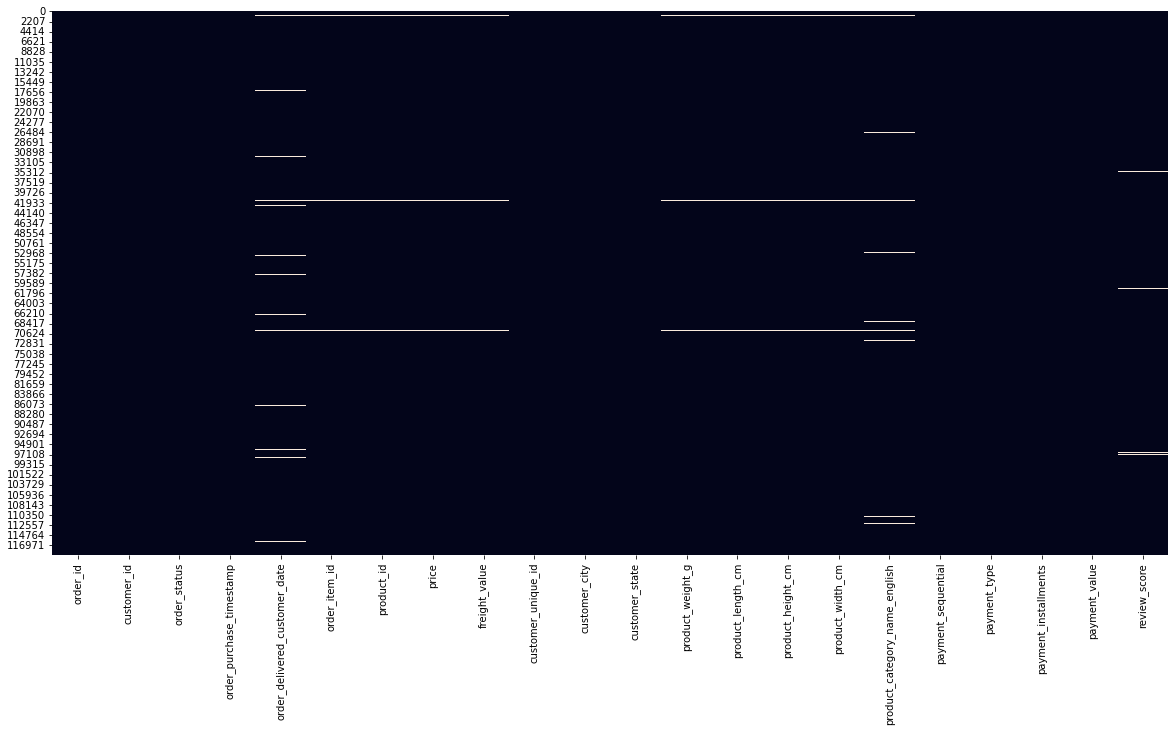

In [34]:
# Pour visualiser la destribution des valeurs manquantes 
plt.figure(figsize=(20,10))
sns.heatmap(data_costumers.isna(), cbar=False)

### Supprimer les doublons :

In [35]:
data_costumers.duplicated().sum()

421

In [36]:
data_costumers.drop_duplicates(keep='first', inplace=True)

### Traitement des valeurs manquantes : 

In [37]:
null = ['price','freight_value','product_weight_g','product_length_cm','product_width_cm']

In [38]:
# calcul de coéficient d'asymétrie 
for c in null:
    skew= round(data_costumers[c].skew(),3)
    print( 'skewness(',c,') : {}'.format(skew))

skewness( price ) : 7.89
skewness( freight_value ) : 5.544
skewness( product_weight_g ) : 3.581
skewness( product_length_cm ) : 1.747
skewness( product_width_cm ) : 1.709


Du point de vu numérique, on remarque une importante asymétrie.

In [39]:
# calcul du coefficient d'aplatissement :
for c in null:
    kurt= round(data_costumers[c].kurtosis(),3)
    print( 'kurtosis(',c,') : {}'.format(kurt))

kurtosis( price ) : 119.039
kurtosis( freight_value ) : 57.618
kurtosis( product_weight_g ) : 16.002
kurtosis( product_length_cm ) : 3.685
kurtosis( product_width_cm ) : 4.567


Les valeurs du kurtosis sont trés grandes et trés loin de 0 donc l'aplatissement n'est pas normal

In [40]:
# calcul du coeficient de variation 
for c in null:
    cv = data_costumers[c].describe().loc['std']/data_costumers[c].describe().loc['mean']
    print(c)
    print('dispresion par unité de moyenne : {}%'.format(round (cv*100)))

price
dispresion par unité de moyenne : 153%
freight_value
dispresion par unité de moyenne : 79%
product_weight_g
dispresion par unité de moyenne : 179%
product_length_cm
dispresion par unité de moyenne : 54%
product_width_cm
dispresion par unité de moyenne : 51%


Les variabilités internes des variables sont jugées trop élevées (CV > 20%). L'imputation par la moyenne est abandonnée.

In [41]:
data_costumers.dropna(subset=['review_score','payment_value','price','freight_value','product_weight_g','product_length_cm','product_width_cm'], inplace= True)

In [42]:
print((data_costumers.isnull().sum()/len(data_costumers))*100)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    2.107109
order_item_id                    0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
product_weight_g                 0.000000
product_length_cm                0.000000
product_height_cm                0.000000
product_width_cm                 0.000000
product_category_name_english    1.450081
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_score                     0.000000
dtype: float64


#### Imputation des valeurs manquantes des colonnes catégorielles :

In [43]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent') 
data_costumers['product_category_name_english'] = imp_mean.fit_transform(np.array(data_costumers['product_category_name_english']).reshape(-1,1))
data_costumers['order_delivered_customer_date'] = imp_mean.fit_transform(np.array(data_costumers['order_delivered_customer_date']).reshape(-1,1))



In [44]:
print((data_costumers.isnull().sum()/len(data_costumers))*100)

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_delivered_customer_date    0.0
order_item_id                    0.0
product_id                       0.0
price                            0.0
freight_value                    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
product_weight_g                 0.0
product_length_cm                0.0
product_height_cm                0.0
product_width_cm                 0.0
product_category_name_english    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_score                     0.0
dtype: float64


### Visualisation :

In [45]:
# catégories des produits :

<AxesSubplot:ylabel='product_category_name_english'>

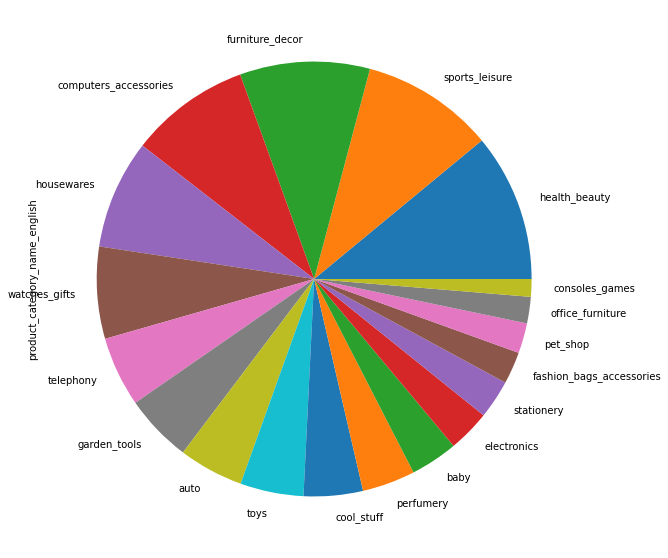

In [46]:
plt.figure(figsize=(10,10))
data_costumers['product_category_name_english'].value_counts().sort_values(ascending= False)[1:20].plot.pie()

- On remarque que les produits sont répartis sur plusieurs catégories, les plus représentés sont : health and beauty, sports, furniture decor, housewares, computers_accesories...

In [47]:
# type de payement

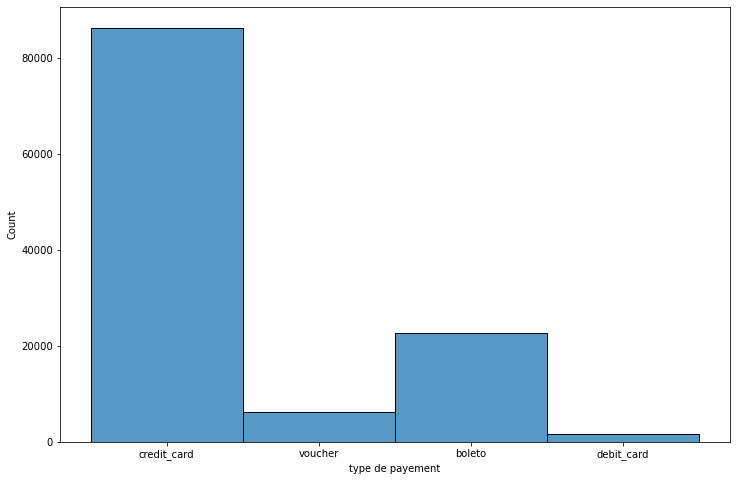

In [48]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='payment_type')
ax.set_xlabel("type de payement")
plt.show()


- On remarque que 80% des paiements environ sont réalisés en carte bancaire. Nous ne prendrons donc pas en considération cette variable dans nos explorations.

In [49]:
# review score
# Répartition des scores 

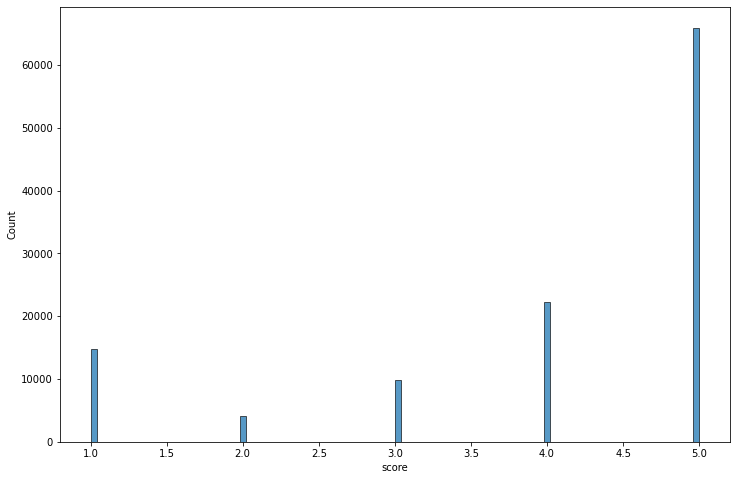

In [50]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='review_score')
ax.set_xlabel("score")
plt.show()

- On remarque que la majorité des clients ont donné un score de 5

In [51]:
# state

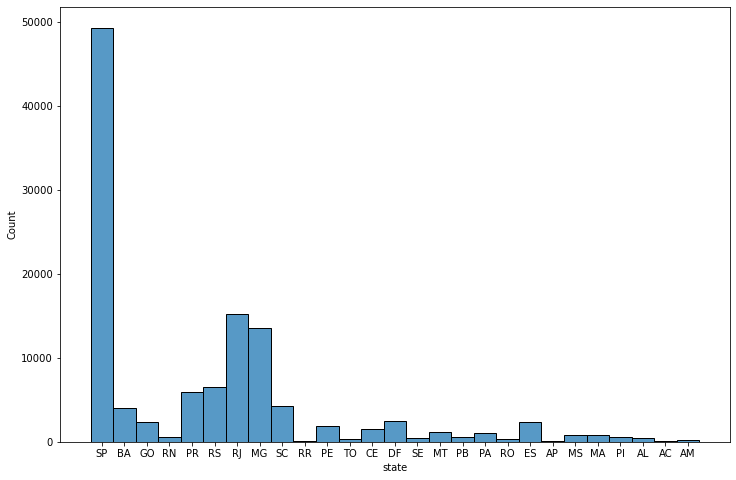

In [52]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='customer_state')
ax.set_xlabel("state")
plt.show()

    - On remarque que l'état dans laquelle les clients ont effectué le plus grand nombre d'achats est São Paulo.

In [53]:
# statut de la commande

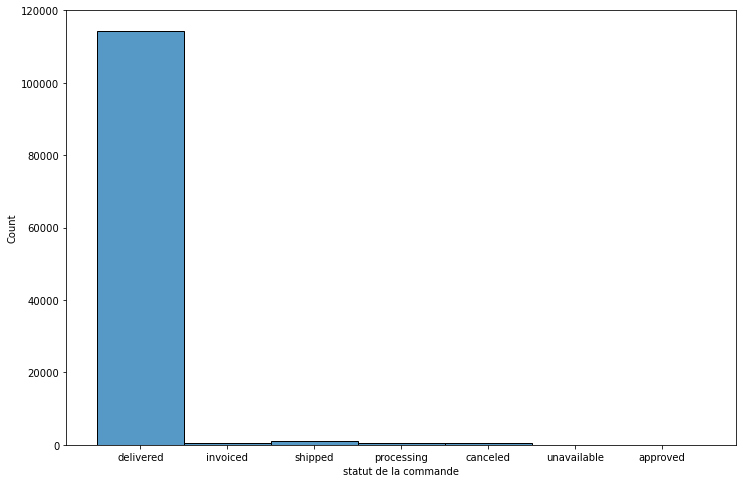

In [54]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='order_status')
ax.set_xlabel("statut de la commande")
plt.show()

- La majorité des commandes ont été délivrées.

 #### La répartition du nombre de commandes par mois, jour de la semaine ou heure de la journée

In [55]:
# Mettre la colonne 'order_delivered_customer_date' sous la forme datetime.

In [56]:
data_costumers['order_delivered_customer_date'] = pd.to_datetime(data_costumers['order_delivered_customer_date'], errors='coerce')

In [57]:
# Mettre la colonne 'order_purchase_timestamp' sous la forme datetime.

In [58]:
data_costumers['order_purchase_timestamp'] = pd.to_datetime(data_costumers['order_purchase_timestamp'], errors='coerce')

In [59]:
# order purchase day :
data_costumers['order_purchase_day'] = data_costumers['order_purchase_timestamp'].dt.day

In [60]:
# order purchase month :
data_costumers['order_purchase_month'] = data_costumers['order_purchase_timestamp'].dt.month

In [61]:
# order purchase year :
data_costumers['order_purchase_year'] = data_costumers['order_purchase_timestamp'].dt.year

In [62]:
# order purchase hour :
data_costumers['order_purchase_hour'] = data_costumers['order_purchase_timestamp'].dt.hour

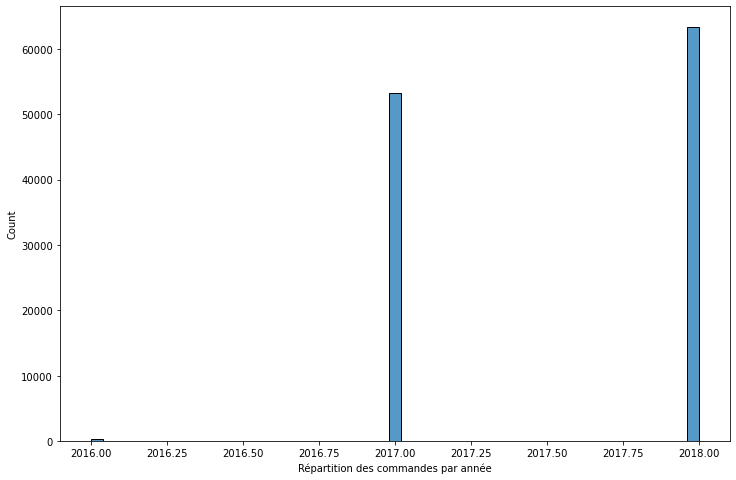

In [63]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='order_purchase_year')
ax.set_xlabel("Répartition des commandes par année")
plt.show()

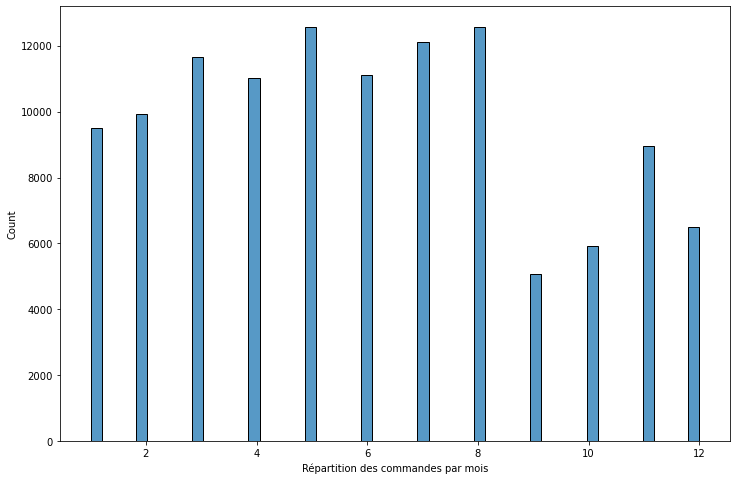

In [64]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='order_purchase_month')
ax.set_xlabel("Répartition des commandes par mois")
plt.show()

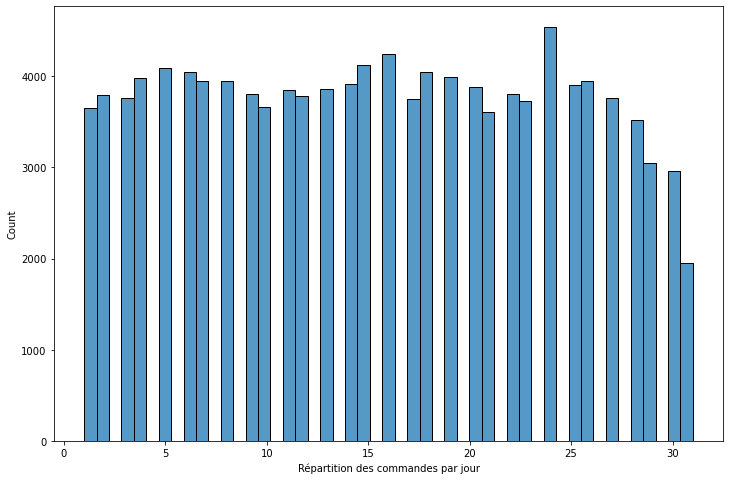

In [65]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='order_purchase_day')
ax.set_xlabel('Répartition des commandes par jour')
plt.show()

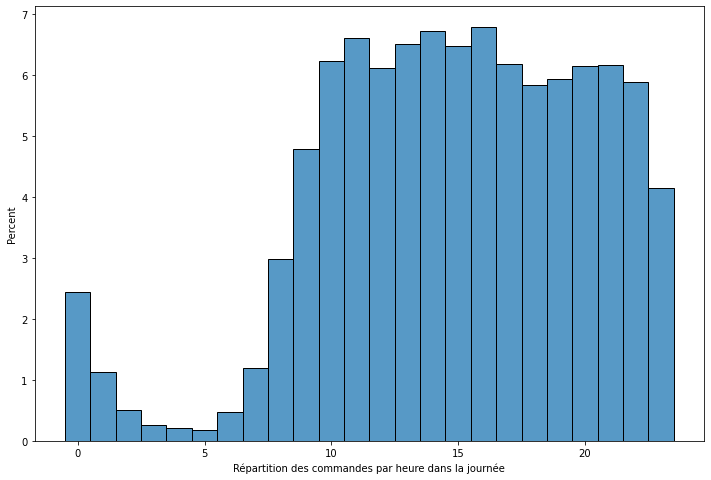

In [66]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_costumers, x='order_purchase_hour', stat="percent", discrete=True)
ax.set_xlabel('Répartition des commandes par heure dans la journée')
plt.show()

Text(0.5, 0, 'Répartition des commandes par année')

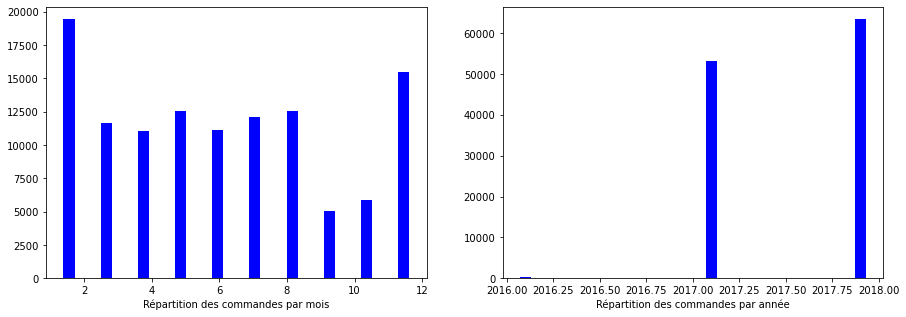

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(x ='order_purchase_month', bins=10, color='blue', histtype= 'bar', rwidth=0.3, data=data_costumers)
plt.xlabel('Répartition des commandes par mois')

plt.subplot(1,2,2)
plt.hist(x= 'order_purchase_year', bins=10, color='blue', histtype= 'bar', rwidth=0.3, data=data_costumers)
plt.xlabel('Répartition des commandes par année')


- On remarque les plus gros écart sur les données mensuelles. Vérifions les variances de chiffre d'affaire sur les mois de l'années

In [68]:
### Chiffre d'affaire sur les mois :

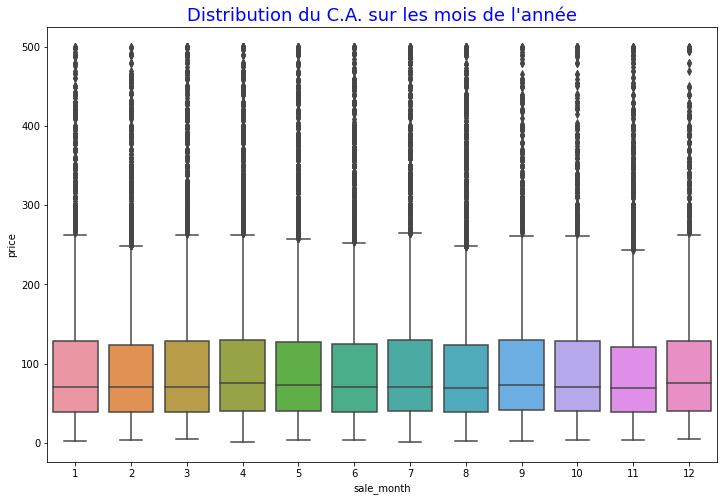

In [69]:
data_costumers["sale_month"] = data_costumers['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=data_costumers[data_costumers.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

- Les médianes et variances restent très proche sur les différents mois de l'année. 

### Feature engineering

#### Delais de livraison 

In [70]:
data_costumers['delais_de_livraison'] = data_costumers['order_delivered_customer_date'] - data_costumers['order_purchase_timestamp']

In [71]:
data_costumers['delais_de_livraison']

0         8 days 10:28:40
1         8 days 10:28:40
2         8 days 10:28:40
3        13 days 18:46:08
4         9 days 09:27:40
               ...       
119138   22 days 04:38:58
119139   24 days 20:37:34
119140   17 days 02:04:27
119141   17 days 02:04:27
119142    7 days 16:11:00
Name: delais_de_livraison, Length: 116890, dtype: timedelta64[ns]

C:\Users\chouc\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


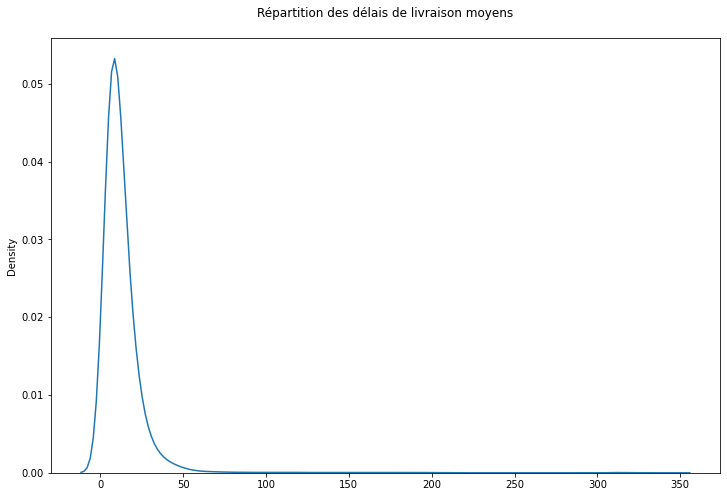

In [72]:
fig = plt.figure(figsize=(12,8))
# sns.set_style('whitegrid')
ax = sns.kdeplot(np.array(data_costumers[data_costumers['delais_de_livraison'].dt.days> 0 ]['delais_de_livraison'].dt.days), bw=0.3, cut= 3)
plt.title(f"Répartition des délais de livraison moyens\n")
plt.show()

                                       -------------------------------------

- Autre variable à créer, la catégorie de produit . En effet, le jeu de données compte plus de 70 catégories différentes (ce qui peut poser problème pour un encodage lors des preprocessing). Nous allons donc devoir regrouper plusieurs de ces catégorie dans une autre catégorie .

Pour cela, nous allons nous baser sur les catégories principales des sites de vente en ligne en 2017, disponibles sur le site http://statista.com :

Fashion, clothing and accessories
Health and Beauty
Toys and baby equipment
Books, CDs and other physical media
Groceries, food and drink
Technology (including phones and computers)
Home and furniture
Flowers and gifts
Other

In [73]:
data_costumers['product_category_name_english'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'bed_bath_table', 'furniture_decor', 'office_furniture',
       'garden_tools', 'computers_accessories', 'toys', 'telephony',
       'health_beauty', 'electronics', 'baby', 'cool_stuff',
       'watches_gifts', 'air_conditioning', 'sports_leisure',
       'books_general_interest', 'construction_tools_construction',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',


In [74]:
# 'Fashion, clothing and accesories' : ['watches_gifts','luggage_accessories','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes']
# 'Health and beauty' : ['perfumery','health_beauty','diapers_and_hygiene']
# 'Toys and baby equipment' : ['toys','baby']
# 'Books, CDs and other physical media' : ['stationery','office_furniture','computers_accessories','books_general_interest','books_technical','cds_dvds_musicals','art','tablets_printing_image','dvds_blu_ray','cine_photo','books_imported','music','arts_and_craftmanship']
# 'Groceries, food and drink' :['food','agro_industry_and_commerce','drinks','food_drink']
# 'Technology' : ['telephony','electronics','air_conditioning','small_appliances','consoles_games','fixed_telephony','audio','computers']
# 'Home and furniture' : ['housewares', 'bed_bath_table','furniture_decor','garden_tools','construction_tools_construction','construction_tools_lights','costruction_tools_garden','home_appliances','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_appliances_2','furniture_living_room','la_cuisine','home_comfort_2','small_appliances_home_oven_and_coffee','furniture_mattress_and_upholstery']

# 'Flowres and gifts' : ['flowers']
# 'Other' : ['auto','pet_shop','cool_stuff','sports_leisure','christmas_supplies','musical_instruments','market_place','party_supplies','industry_commerce_and_business','construction_tools_safety','home_construction','costruction_tools_tools','signaling_and_security','security_and_services']

In [75]:
data_costumers['product_category_name_english'].replace(to_replace=['watches_gifts','luggage_accessories','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'], value = 'Fashion, clothing and accesories', inplace = True)

In [76]:
data_costumers['product_category_name_english'].replace(to_replace=['perfumery','health_beauty','diapers_and_hygiene'], value = 'Health and beauty', inplace = True)

In [77]:
data_costumers['product_category_name_english'].replace(to_replace=['stationery','office_furniture','computers_accessories','books_general_interest','books_technical','cds_dvds_musicals','art','tablets_printing_image','dvds_blu_ray','cine_photo','books_imported','music','arts_and_craftmanship'], value = 'Toys and baby equipment', inplace = True)

In [78]:
data_costumers['product_category_name_english'].replace(to_replace=['toys','baby'], value = 'Books, CDs and other physical media', inplace = True)

In [79]:
data_costumers['product_category_name_english'].replace(to_replace=['food','agro_industry_and_commerce','drinks','food_drink'], value = 'Groceries, food and drink', inplace = True)

In [80]:
data_costumers['product_category_name_english'].replace(to_replace=['telephony','electronics','air_conditioning','small_appliances','consoles_games','fixed_telephony','audio','computers'], value = 'Technology', inplace = True)

In [81]:
data_costumers['product_category_name_english'].replace(to_replace=['housewares', 'bed_bath_table','furniture_decor','garden_tools','construction_tools_construction','construction_tools_lights','costruction_tools_garden','home_appliances','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_appliances_2','furniture_living_room','la_cuisine','home_comfort_2','small_appliances_home_oven_and_coffee','furniture_mattress_and_upholstery'], value = 'Home and furniture', inplace = True)

In [82]:
data_costumers['product_category_name_english'].replace(to_replace=['flowers'], value = 'Flowres and gifts', inplace = True)

In [83]:
data_costumers['product_category_name_english'].replace(to_replace=['auto','pet_shop','cool_stuff','sports_leisure','christmas_supplies','musical_instruments','market_place','party_supplies','industry_commerce_and_business','construction_tools_safety','home_construction','costruction_tools_tools','signaling_and_security','security_and_services'], value = 'Other', inplace = True)

In [84]:
len(data_costumers['product_category_name_english'].unique())

9

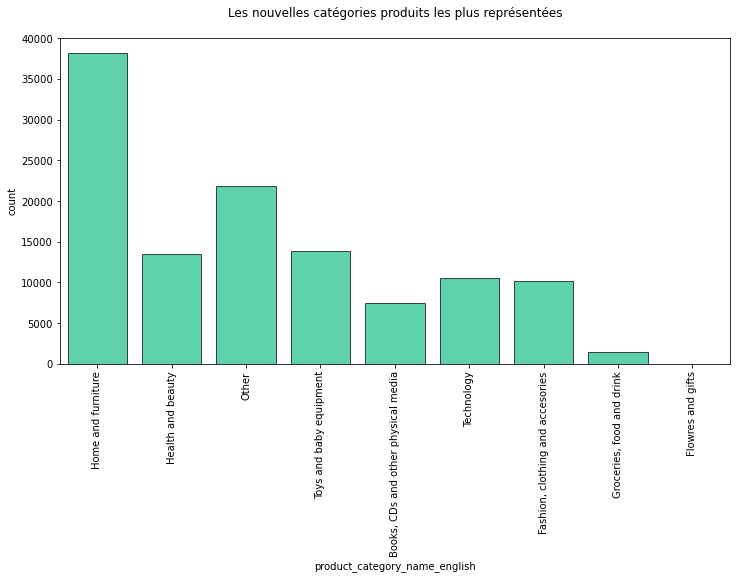

In [85]:
# Plot categories count in dataset
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=data_costumers, x='product_category_name_english',
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data_costumers['product_category_name_english'].nunique()),
           data_costumers['product_category_name_english'].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits les plus représentées\n")
plt.show()

#### Dépense totale d'un client 

In [97]:
data_costumers.groupby(['customer_unique_id']).payment_value.sum().reset_index()

#### Nombre moyen d'articles achetés par client 

In [87]:
data_costumers.groupby(['customer_unique_id']).product_id.count().reset_index()

,customer_unique_id,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94702,fffcf5a5ff07b0908bd4e2dbc735a684,2
94703,fffea47cd6d3cc0a88bd621562a9d061,1
94704,ffff371b4d645b6ecea244b27531430a,1
94705,ffff5962728ec6157033ef9805bacc48,1


#### Nombre total d'articles par commande 

In [88]:
data_costumers.groupby(['order_id']).product_id.count().reset_index()

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
97895,fffc94f6ce00a00581880bf54a75a037,1
97896,fffcd46ef2263f404302a634eb57f7eb,1
97897,fffce4705a9662cd70adb13d4a31832d,1
97898,fffe18544ffabc95dfada21779c9644f,1


#### Score moyen par client 

In [89]:
data_costumers.groupby(['customer_unique_id']).review_score.mean().reset_index()

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0
...,...,...
94702,fffcf5a5ff07b0908bd4e2dbc735a684,5.0
94703,fffea47cd6d3cc0a88bd621562a9d061,4.0
94704,ffff371b4d645b6ecea244b27531430a,5.0
94705,ffff5962728ec6157033ef9805bacc48,5.0


#### haversine_distances

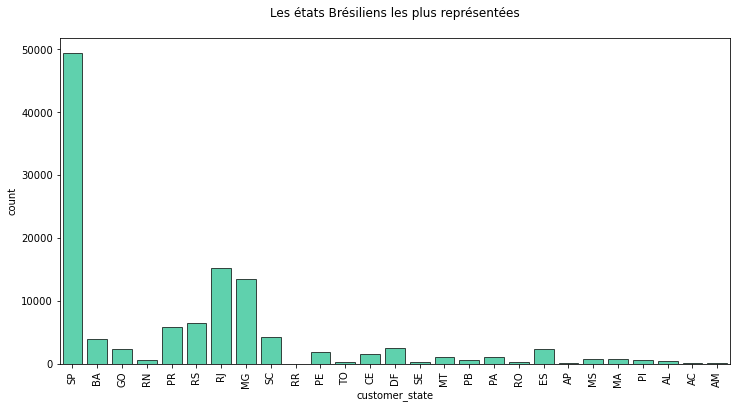

In [90]:
# Countplot of states repartition
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=data_costumers, x="customer_state",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data_costumers["customer_state"].nunique()),
           data_costumers["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées\n")
plt.show()

- Afin d'utiliser une variable de localisation encodable sans impact négatif sur nos modélisation, nous allons calculer la distance Haversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist :

In [99]:
print((df_geolocation.isnull().sum()/len(df_geolocation))*100)

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64


In [100]:
df_geolocation_unique = df_geolocation.drop_duplicates(subset=['geolocation_city']).reset_index()

In [101]:
df_geolocation_unique

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,5,1012,-23.547762,-46.635361,são paulo,SP
2,10166,1307,-23.556812,-46.657135,sao bernardo do campo,SP
3,50999,3203,-23.216648,-46.861371,jundiaí,SP
4,71908,4004,-23.574798,-46.650106,taboão da serra,SP
...,...,...,...,...,...,...
8006,999806,99940,-28.053148,-51.861135,ibiaçá,RS
8007,999846,99952,-28.160371,-51.936922,santa cecilia do sul,RS
8008,999867,99970,-28.342325,-51.876023,ciríaco,RS
8009,999891,99930,-27.921611,-52.264586,estação,RS


In [102]:
df_geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [103]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(wiki_url)[3].set_index("Code")
states_table.head(6)

# print(pd.read_html(wiki_url)[3])


,Flag and name,Capital,Largest city,Area(km2)[20],Population(2019)[21],"Density (perkm2, 2019)","GDP (R$millions, 2016)[22]",HDI(2017)[23]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164123,880000,6.34,15000,0.719
AL,Alagoas,Maceió,Maceió,27779,3334000,125.52,50000,0.683
AP,Amapá,Macapá,Macapá,142829,838000,2.63,12000,0.740
AM,Amazonas,Manaus,Manaus,1559159,4147000,2.58,94000,0.733
BA,Bahia,Salvador,Salvador,564733,14897000,30.52,262000,0.714
CE,Ceará,Fortaleza,Fortaleza,148921,8843000,60.33,143000,0.735


In [104]:
 states_table['Capital']  = states_table['Capital'].str.lower()

In [105]:
df_state = states_table.merge(df_geolocation_unique, how='left', left_on='Capital', right_on='geolocation_city')

In [106]:
df_state_geo = df_state.drop(columns=['Flag and name', 'Capital','Largest city','Area(km2)[20]','Population(2019)[21]','Density (perkm2, 2019)','GDP (R$millions, 2016)[22]','HDI(2017)[23]','index','geolocation_zip_code_prefix','geolocation_city'])

In [107]:
df_state_geo

,geolocation_lat,geolocation_lng,geolocation_state
0,-9.926145,-67.835117,AC
1,-9.673523,-35.759550,AL
2,0.052674,-51.061010,AP
3,-3.098469,-59.999784,AM
4,-12.987172,-38.522682,BA
5,-3.725240,-38.545775,CE
6,-15.801476,-47.882896,DF
7,-20.319586,-40.329319,ES
8,-16.697334,-49.254888,GO
9,-2.546079,-44.308986,MA


In [108]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import math
from math import sin
from math import cos
from math import sqrt
from math import asin
# Olist location
olist_lat = -25.43045
olist_lon = -49.29207
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d


In [109]:
df_state_geo['distance_from_olist']=[haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(df_state_geo.geolocation_lat, 
                                              df_state_geo.geolocation_lng)]

In [110]:
df_state_geo

,geolocation_lat,geolocation_lng,geolocation_state,distance_from_olist
0,-9.926145,-67.835117,AC,1618.914851
1,-9.673523,-35.759550,AL,1403.700377
2,0.052674,-51.061010,AP,1763.441197
3,-3.098469,-59.999784,AM,1697.946434
4,-12.987172,-38.522682,BA,1108.323821
5,-3.725240,-38.545775,CE,1659.528170
6,-15.801476,-47.882896,DF,671.021833
7,-20.319586,-40.329319,ES,670.211726
8,-16.697334,-49.254888,GO,602.984707
9,-2.546079,-44.308986,MA,1614.394093


In [ ]:
# 2 ème méthode

In [ ]:
# from sklearn.metrics.pairwise import haversine_distances
# from math import radians

In [ ]:
# olist = [-25.422910, -49.304970]
# olist_in_radians = [radians(_) for _ in olist]
# all_distances = []
# for index, row in df_state_geo.iterrows() : 
#      geo_lat_lng= [row['geolocation_lat'],row['geolocation_lng']]
#      geo_in_radians = [radians(_) for _ in geo_lat_lng]
#      result = haversine_distances([olist_in_radians, geo_in_radians])
#      all_distances.append(result)
#      print(result * 6371000/1000)
     
    
# df_state_geo['distance_from_olist'] = all_distances

#### Montant total depensé dans chaque State

In [111]:
d = data_costumers.groupby(['customer_state'])['payment_value'].agg('sum').reset_index()

<AxesSubplot:xlabel='customer_state', ylabel='payment_value'>

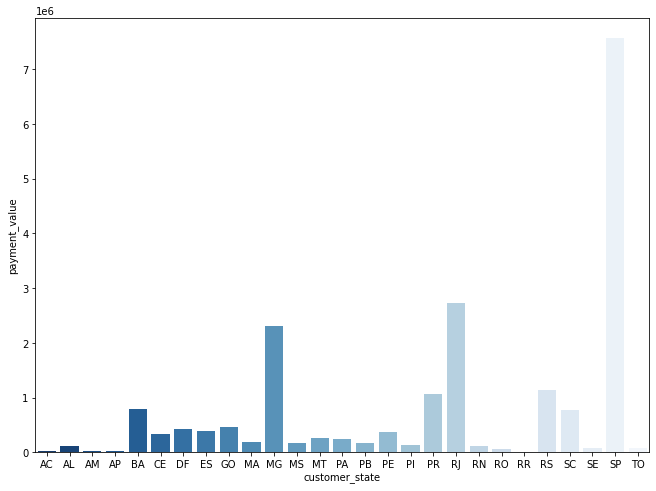

In [112]:
plt.figure(figsize=(11,8))
sns.barplot(x= d['customer_state'], y= d['payment_value'], palette= 'Blues_r')

In [113]:
data_costumers3 = df_state_geo.merge(data_costumers, how='left', left_on='geolocation_state', right_on='customer_state')

### Corrélations

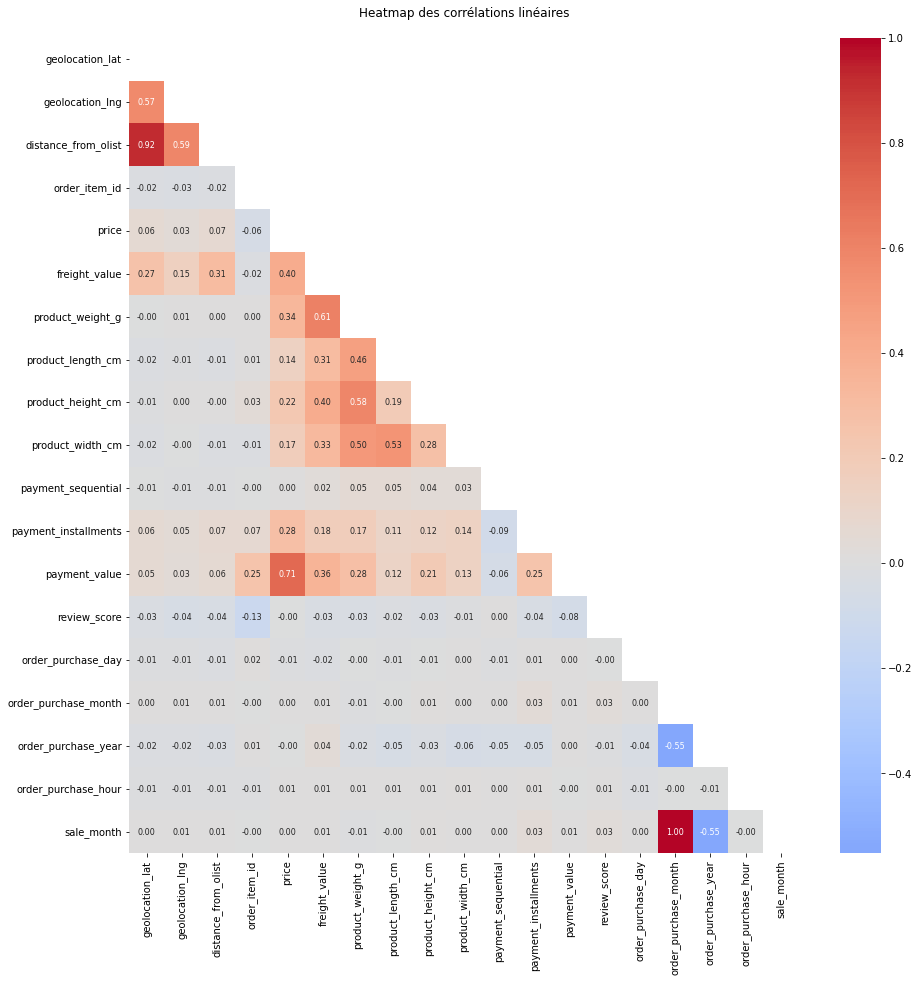

In [114]:
corr = data_costumers3.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

### Création du dataset clients :

In [133]:
d1 = data_costumers3.groupby(['customer_unique_id'])['payment_installments'].aggregate('sum').reset_index()

In [134]:
d2 = data_costumers3.groupby(['customer_unique_id'])['freight_value'].aggregate('sum').reset_index()

In [135]:
d3 = d1.merge(d2, how='left', on='customer_unique_id')

In [136]:
d4 = data_costumers3.groupby(['customer_unique_id'])['payment_sequential'].aggregate('sum').reset_index()

In [137]:
d5 = d3.merge(d4, how='left', on='customer_unique_id')

In [138]:
d6 = data_costumers3.groupby(['customer_unique_id'])['payment_value'].aggregate('sum').reset_index()

In [139]:
col = ['customer_unique_id','product_category_name_english','distance_from_olist','order_purchase_hour','delais_de_livraison']

In [140]:
data_to_merge = data_costumers3[col]

In [141]:
data_to_merge = data_to_merge.drop_duplicates()

In [142]:
d7 = d5.merge(data_to_merge, how='left', on='customer_unique_id')

In [143]:
data_costumers_final = d6.merge(d7, how='left', on='customer_unique_id')

In [144]:
d8 = data_costumers3.groupby(['customer_unique_id'])['payment_value'].aggregate('sum').reset_index()

In [145]:
d8 = data_costumers3.groupby(['customer_unique_id'])['review_score'].aggregate('mean').reset_index()

In [146]:
data_costumers_final = d8.merge(data_costumers_final, how='left', on='customer_unique_id')

In [147]:
data_costumers_final.dtypes

customer_unique_id                        object
review_score                             float64
payment_value                            float64
payment_installments                     float64
freight_value                            float64
payment_sequential                       float64
product_category_name_english             object
distance_from_olist                      float64
order_purchase_hour                        int64
delais_de_livraison              timedelta64[ns]
dtype: object

In [148]:
data_costumers_final['delais_de_livraison'] = data_costumers_final['delais_de_livraison'].astype('timedelta64[D]')

In [149]:
data_costumers_final.dtypes

customer_unique_id                object
review_score                     float64
payment_value                    float64
payment_installments             float64
freight_value                    float64
payment_sequential               float64
product_category_name_english     object
distance_from_olist              float64
order_purchase_hour                int64
delais_de_livraison              float64
dtype: object

In [150]:
import pickle
path = r'C:/Users/chouc/openclassrooms/projet 5/model/data_costumers.pickle'
data_costumers.to_pickle(path)

In [151]:
import pickle
path = r'C:/Users/chouc/openclassrooms/projet 5/model/data_costumers_final.pickle'
data_costumers_final.to_pickle(path)